In [403]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [405]:
# 1. Crear dataset
np.random.seed(42)
mxn = np.random.uniform(1000, 100000, 1000)  # salarios en MXN ENTRADAS
usd = mxn / 17.8                            # conversión a USD SALIDAS

#print(mxn)
#print(usd)

In [407]:
# 2. Separar 80% entrenamiento y 20% validación
x_train, x_val, y_train, y_val = train_test_split(mxn, usd, test_size=0.2, random_state=42)

In [439]:
# Definir los hiperparametros
learning_rate = 0.05
epochs = 10

In [441]:
# Diseñar la red neuronal: Una capa de entrada y una de salida
capa = tf.keras.layers.Dense(units = 1, input_shape = [1])

# Crear el modelo con keras
modelo = tf.keras.Sequential([capa])

In [443]:
# Compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss='mean_squared_error'
)

In [445]:
# Entrenar el modelo usando datos de validación
print("Entrenando . . .")
historial = modelo.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    verbose=False
)
print("Modelo entrenado")

Entrenando . . .
Modelo entrenado


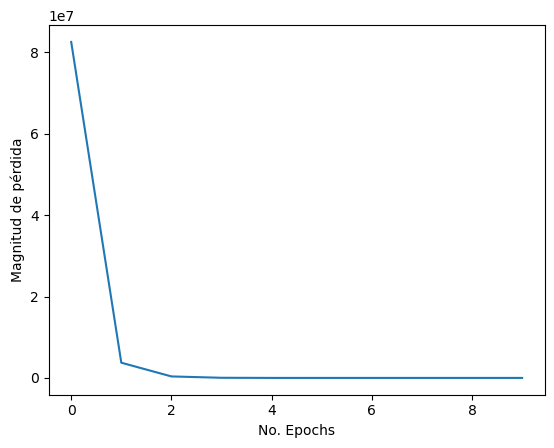

In [447]:
# Mostrar la pérdida de entrenamiento y validación
import matplotlib.pyplot as plt
plt.xlabel("No. Epochs")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

In [449]:
# Intentar predecir
monedas = np.array([3000])
resultado = modelo.predict(monedas)
print(f"{monedas[0]} es equivalente a {resultado[0][0]} Dolares")
monedas = np.array([5000])
resultado = modelo.predict(monedas)
print(f"{monedas[0]} es equivalente a {resultado[0][0]} Dolares")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
3000 es equivalente a 168.16587829589844 Dolares
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
5000 es equivalente a 280.5350646972656 Dolares


In [389]:
# 7. Guardar el modelo
model.save("modelo_conversion.keras")